In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, models, layers

Importing necessary libraries for implementing the LetNet-5 research paper

In [3]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

The paper makes use of MNIST dataset for model development, which has been pre-partitioned into train and test categories

In [4]:
X_train = tf.pad(X_train[..., None] / 255.0, [[0,0],[2,2],[2,2],[0,0]])
X_test  = tf.pad(X_test[..., None]  / 255.0, [[0,0],[2,2],[2,2],[0,0]])

The above code applied the concept ofpadding, and normaliaztion, this makes the mean input roughly 0, and the variance roughly 1 which accelerates learning according to the paer.


In [5]:
X_train.shape


TensorShape([60000, 32, 32, 1])

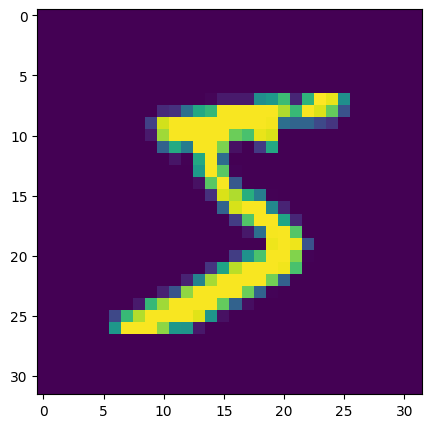

In [6]:
plt.figure(figsize = (5, 5))
plt.imshow(X_train[0])


A simple plot to show an instance of the MNIST dataset

In [7]:
model = keras.Sequential([
layers.Conv2D(filters = 6, kernel_size =(5, 5), input_shape =(32,32,1), activation = 'tanh'),
layers.AveragePooling2D(pool_size = 2,strides= 2),

layers.Conv2D(filters= 16, kernel_size =(5,5), activation = 'tanh'),
layers.AveragePooling2D(pool_size = 2, strides = 2),
layers.Conv2D(filters = 120, kernel_size =(5,5), activation = 'tanh'),


layers.Flatten(),
layers.Dense(84, activation = 'tanh'),
layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer =tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

model.fit(X_train, y_train, epochs = 10)


C:\Users\User\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8477 - loss: 0.4894
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9727 - loss: 0.0895
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9830 - loss: 0.0565
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9852 - loss: 0.0467
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9895 - loss: 0.0349
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9913 - loss: 0.0287
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9925 - loss: 0.0224
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9938 - loss: 0.0191
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9959 - loss: 0.0144
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9962 - loss: 0.0131


The above code, create a Convolutional neural network(CNN) made to handle the variability of the 2D inputs- Letnet-5.
Its architecture is written with specification from the research paper for reproducibility.

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test inaccuracy: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0458
Test accuracy: 0.9873
Test inaccuracy: 0.0400


An evaluation done on test set, to compute accuracy score, and inaccuracy score(loss), which were recorded to be 0.9873 and0.0400 respectively.
Very close to the reported accuracy score in the LetNet-5's research paper's experimental implementation.